In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
#data
train_url = "https://raw.githubusercontent.com/Sandhya-G/Aggression-Detection/master/dataset/train_data.csv"
train = pd.read_csv(train_url)
test_url =  "https://raw.githubusercontent.com/Sandhya-G/Aggression-Detection/master/dataset/test_data.csv"
test = pd.read_csv(test_url)
total_comm = len(train) + len(test)
print(total_comm)

54313


In [33]:
train_hate = train['class'].sum()
test_hate = test['class'].sum()
hate_comments = train_hate + test_hate
nonhate_comments = total_comm - hate_comments
print('No of hate comments:',hate_comments)
print('No of non-hate comments:',nonhate_comments)

No of hate comments: 22633
No of non-hate comments: 31680


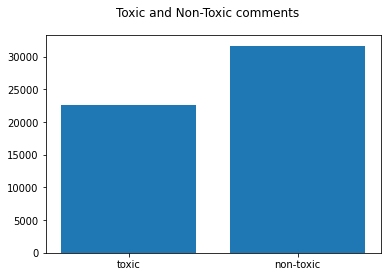

In [35]:
names = ['toxic', 'non-toxic']
values = [hate_comments,nonhate_comments]
plt.bar(names, values)
plt.suptitle('Toxic and Non-Toxic comments')
plt.show()

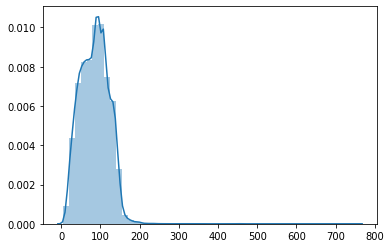

In [18]:
#length of words
tweet_len = [len(tweet) for tweet in tweets]
sns.distplot(tweet_len)

In [0]:
train_ntox = train[train["class"] == 0]
train_tox = train[train["class"] == 1]

In [0]:
#wordclouds...!

STOPWORDS.add('RT')
STOPWORDS.add('user')
STOPWORDS.add('amp')
sw = set(STOPWORDS)
def draw_word_cloud(data):
  t = " ".join(tweet for tweet in data.tweet)
  wordcloud = WordCloud(width = 5000, height = 4000,stopwords=sw, background_color="black").generate(t)
  plt.figure(figsize = (9,9))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

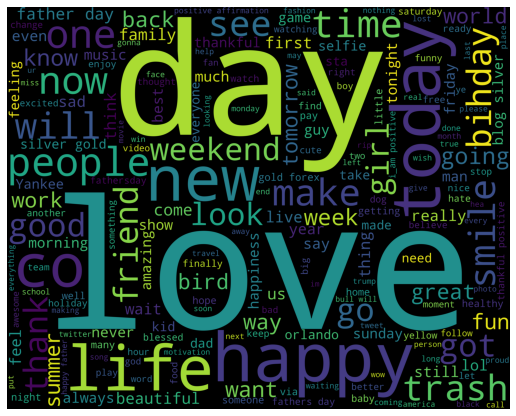

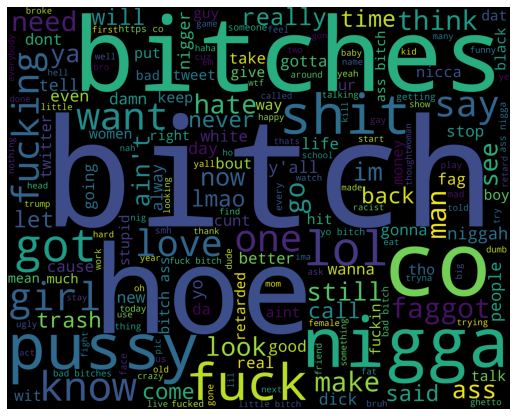

In [72]:
#wordcloud for non-toxic data
draw_word_cloud(train_ntox)

#wordclous for toxic data
draw_word_cloud(train_tox)

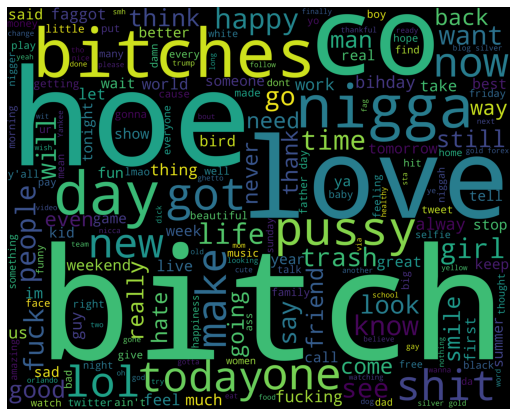

In [73]:
#wordcloud for entire data
draw_word_cloud(train)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fadb341f278>,
                    color=None,
                    features=['00', '000', '0000000000000', '000001', '001',
                              '007', '007beardownjedi', '007m_h', '0099',
                              '00_jackie', '00am', '00h30', '00pm',
                              '00sexilexi00', '01', '0115', '0124jessi',
                              '012llzcmsu', '01926889917', '01takesthelead',
                              '02', '0221', '0266808099', '03', '0300',
                              '030916', '03111880779', '033', '0345', '039', ...],
                    n=None, orient='h')

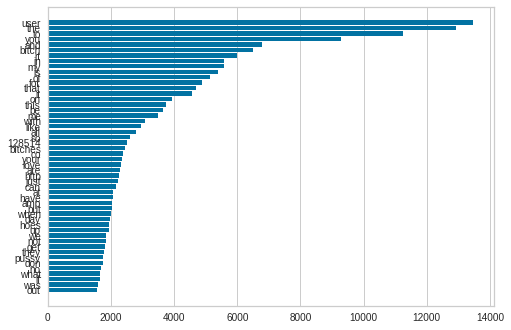

In [76]:
#frequenctly occuring words without stopwords removed
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(train.tweet)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features = features, orient='h')
visualizer.fit(docs)


In [0]:
#most commonly occuring hashtags in the data
#to check if hashtags are of importance
t = " ".join(tweet for tweet in data.tweet)
t = t.split(" ")
hashtags = " ".join(ht for ht in t if ht.startswith("#"))

In [94]:
print(hashtags)

#nofilter #fathersday #dad #lapis#rollen#new#hair#brond#gradation#my #instapic#instagram#instagood#l4l#girl#gâ¦ #thankful #positive #reginamills #gbp/usd #blog #silver #gold #forex #giveaway #laugh #sundayfunday #MyGoalFor2012 #father #dad #funny #silly #tshi #366photos2016 #saturday #weekendâ¦ #NL #fifa17 #AWB. #media #antigun #plies #embarrassing #thekilling #shahs #love #princess #bike #cycling #stuck #likeabottleofpâ¦ #gutted #rosie #ilovemydog #dachshund #dachshundsofinstagram #bedtimeâ¦ #getuickets #national #day, #icedtea #allblacks #allblackeverything #nzlvwal #beautiful #smooth #lifestyle #skin #instasize #f4f #fashion #heavyhea #letsummerbegin #nowork #beenwaiting #punjab #bjp, #udtapunjab' #true #life #life #you #me #question #health #future #success #york #itâllbemurder #kombin#shoes #instatags4likes #vscolove #vscogood #vscoturkey #istanbul #albumdenyansiyanlar #allshotsturkeâ¦ #confused #disappointed #boringlives #nodream #ozziecat... #morning #flowers #hydrangea #

In [0]:
wordcloud = WordCloud(width = 5000, height = 4000,stopwords=sw, background_color="white").generate(hashtags)

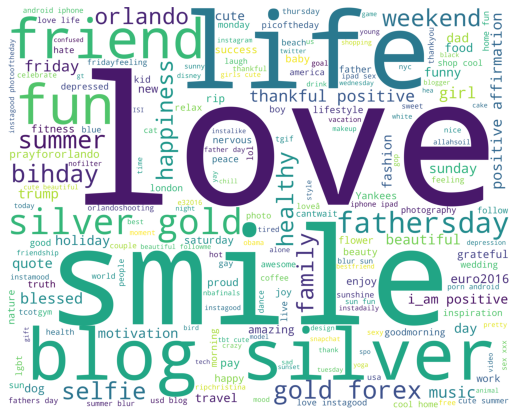

In [97]:
plt.figure(figsize = (9,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()